In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from pathlib import Path
import matplotlib.pyplot as plt

# Define paths
DATA_ROOT = Path("../data/raw/Data/Original")
PARTICIPANTS = [f"p{i:02d}" for i in range(15)]

# Check dataset structure
print("Dataset Structure:")
for participant in PARTICIPANTS[:3]:  # Check first 3 participants
    p_path = DATA_ROOT / participant
    if p_path.exists():
        days = [d for d in os.listdir(p_path) if os.path.isdir(p_path / d)]
        print(f"{participant}: {len(days)} days")
        
        # Check first day
        first_day = sorted(days)[0]
        day_path = p_path / first_day
        images = [f for f in os.listdir(day_path) if f.endswith('.jpg')]
        print(f"  {first_day}: {len(images)} images")


Dataset Structure:
p00: 40 days
  Calibration: 0 images
p01: 70 days
  Calibration: 0 images
p02: 40 days
  Calibration: 0 images


In [2]:
def parse_annotation_line(line):
    """Parse a single line from annotation.txt"""
    values = line.strip().split()
    values = [float(v) for v in values]
    
    # Extract key dimensions
    eye_landmarks = values[0:24]
    gaze_2d_screen = values[24:26]
    gaze_3d_camera = values[26:29]
    head_pose = values[29:35]
    right_eye_3d = values[35:38]
    left_eye_3d = values[38:41]
    
    return {
        'eye_landmarks': np.array(eye_landmarks),
        'gaze_2d_screen': np.array(gaze_2d_screen),
        'gaze_3d_camera': np.array(gaze_3d_camera),
        'head_pose': np.array(head_pose),
        'right_eye_3d': np.array(right_eye_3d),
        'left_eye_3d': np.array(left_eye_3d)
    }

# Test with first participant's first day
p00_path = DATA_ROOT / "p00" / "day01"
annotation_file = p00_path / "annotation.txt"

print(f"Reading {annotation_file}")
annotations = []

with open(annotation_file, 'r') as f:
    for line in f:
        ann = parse_annotation_line(line)
        annotations.append(ann)

print(f"Loaded {len(annotations)} annotations")
print(f"First annotation gaze_2d_screen: {annotations[0]['gaze_2d_screen']}")


Reading ..\data\raw\Data\Original\p00\day01\annotation.txt
Loaded 995 annotations
First annotation gaze_2d_screen: [854. 270.]


Screen size: 1280.0 × 800.0


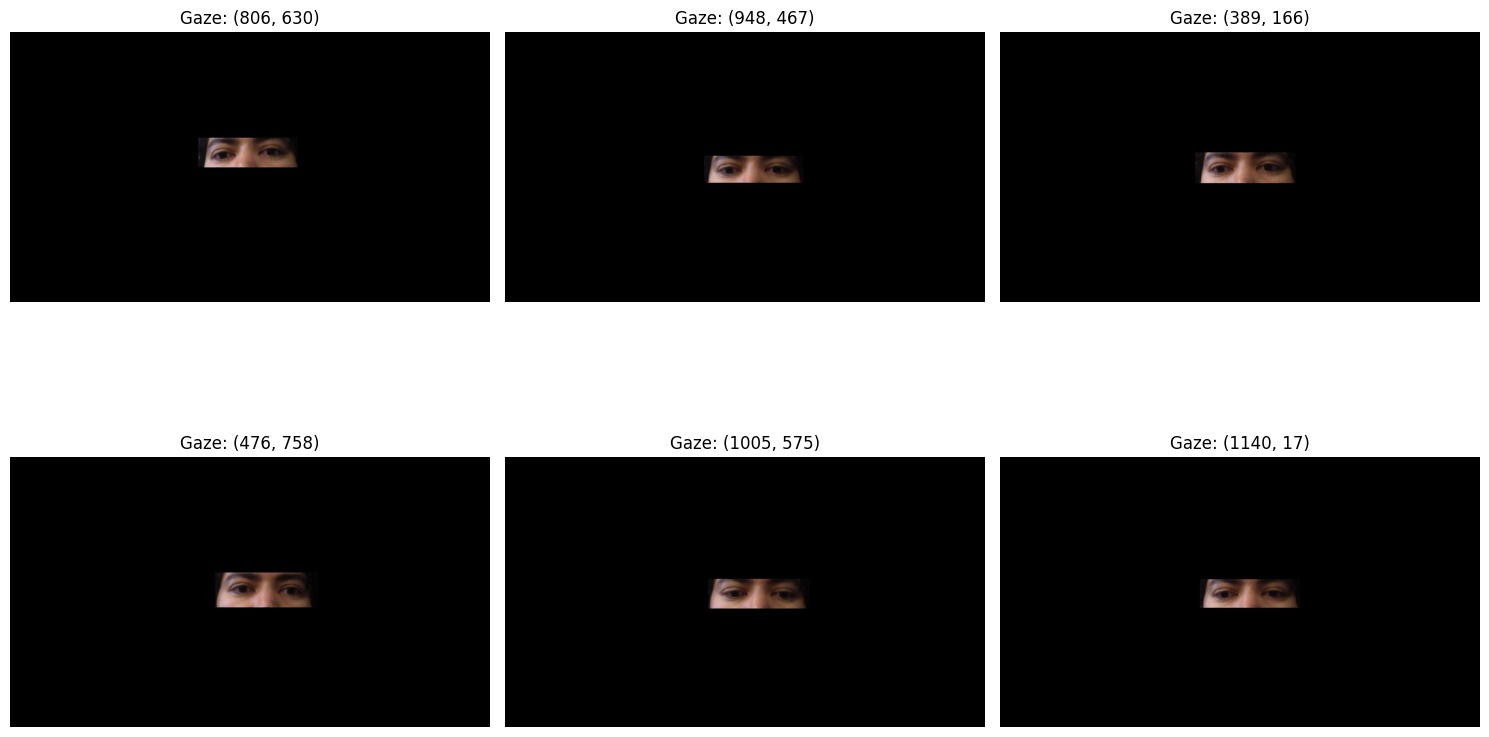

✓ Data exploration complete


In [3]:
# Load and display sample images with gaze annotations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Load first 6 images
p00_path = DATA_ROOT / "p00" / "day01"
images = sorted([f for f in os.listdir(p00_path) if f.endswith('.jpg')])[:6]

# Read screen size for normalization
calib_path = Path("../data/raw/Calibration/p00/screenSize.mat")
import scipy.io as sio
screen_data = sio.loadmat(str(calib_path))
screen_height = float(screen_data['height_pixel'][0][0])
screen_width = float(screen_data['width_pixel'][0][0])

print(f"Screen size: {screen_width} × {screen_height}")

for idx, img_file in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    
    # Load image
    img_path = p00_path / img_file
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Load corresponding annotation
    annotation_file = p00_path / "annotation.txt"
    with open(annotation_file, 'r') as f:
        lines = f.readlines()
        image_idx = int(img_file.replace('.jpg', ''))
        ann = parse_annotation_line(lines[image_idx])
        gaze_2d = ann['gaze_2d_screen']
    
    # Display image
    ax.imshow(img)
    ax.set_title(f"Gaze: ({gaze_2d[0]:.0f}, {gaze_2d[1]:.0f})")
    ax.axis('off')

plt.tight_layout()
plt.savefig('../results/plots/sample_images.png')
plt.show()

print("✓ Data exploration complete")
